In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### We begin by reading in a MEOP file.

MEOP is the [Marine Mammals Exploring the Oceans Pole to Pole](https://meop.net/) program, which is an international consortium that tags marine mammals with sattelite relay data loggers. These data loggers have GPS and CTD (conductivity, temperature, and depth) sensors. 

MEOP has revolutionized our observational understanding of remote regions such as the Southern Ocean. Below is a data file from one of our intrepid seals, very poetically named CT9-028597-05 :)

Let's dive into it and see what this seal was exploring during our brief collaboration!

In [2]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =

In [50]:
meop = pd.read_csv("ct9-28597-05_ODV.txt", skiprows=1, delimiter="\t", index_col=False)

In [51]:
meop

,Cruise,Station,Type,mon/day/yr,hh:mm,Longitude [degrees_east],Latitude [degrees_north],Depth [m],QF,Temperature [C],QF.1,Salinity [psu],QF.2
0,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,6.0,0,1.1550,0,34.1600,0
1,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,7.0,0,1.1545,0,34.1604,0
2,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,8.0,0,1.1539,0,34.1609,0
3,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,9.0,0,1.1534,0,34.1613,0
4,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,10.0,0,1.1528,0,34.1617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270868,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,546.0,0,1.5744,0,34.8825,0
270869,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,547.0,0,1.5747,0,34.8830,0
270870,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,548.0,0,1.5751,0,34.8834,0
270871,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,549.0,0,1.5754,0,34.8839,0


The data is organized into 13 columns and 270,873 rows. Can you make sense of the structure of the data? See how the "Depth" field varies? Remember that the data is recorded for individual dives and is organized from the top of the dive to the bottom of the dive. You also have the time and the position of the dives and the temperature and salinity that was recorded. The quality flags (QF) are usually important, but in our case, the data is already selected for "good" quality flags alone.

In [53]:
meop.loc[:, "Cruise"].unique()

array(['ct9-28597-05'], dtype=object)

In [54]:
meop.head(5)

,Cruise,Station,Type,mon/day/yr,hh:mm,Longitude [degrees_east],Latitude [degrees_north],Depth [m],QF,Temperature [C],QF.1,Salinity [psu],QF.2
0,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,6.0,0,1.1550,0,34.1600,0
1,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,7.0,0,1.1545,0,34.1604,0
2,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,8.0,0,1.1539,0,34.1609,0
3,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,9.0,0,1.1534,0,34.1613,0
4,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,10.0,0,1.1528,0,34.1617,0


In [55]:
meop.tail(5)

,Cruise,Station,Type,mon/day/yr,hh:mm,Longitude [degrees_east],Latitude [degrees_north],Depth [m],QF,Temperature [C],QF.1,Salinity [psu],QF.2
270868,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,546.0,0,1.5744,0,34.8825,0
270869,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,547.0,0,1.5747,0,34.8830,0
270870,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,548.0,0,1.5751,0,34.8834,0
270871,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,549.0,0,1.5754,0,34.8839,0
270872,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,550.0,0,1.5758,0,34.8844,0


You can concatenate columns using the "+" operator

In [56]:
meop["mon/day/yr"]+ " "+ meop["hh:mm"]

0         02/22/2005 17:40
1         02/22/2005 17:40
2         02/22/2005 17:40
3         02/22/2005 17:40
4         02/22/2005 17:40
                ...       
270868    11/26/2005 22:10
270869    11/26/2005 22:10
270870    11/26/2005 22:10
270871    11/26/2005 22:10
270872    11/26/2005 22:10
Length: 270873, dtype: object

Pandas understands most date and time formats and can convert it to the numpy date format

In [57]:
meop["datetime"] = pd.to_datetime(meop["mon/day/yr"]+ " "+ meop["hh:mm"])

In [58]:
meop

,Cruise,Station,Type,mon/day/yr,hh:mm,Longitude [degrees_east],Latitude [degrees_north],Depth [m],QF,Temperature [C],QF.1,Salinity [psu],QF.2,datetime
0,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,6.0,0,1.1550,0,34.1600,0,2005-02-22 17:40:00
1,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,7.0,0,1.1545,0,34.1604,0,2005-02-22 17:40:00
2,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,8.0,0,1.1539,0,34.1609,0,2005-02-22 17:40:00
3,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,9.0,0,1.1534,0,34.1613,0,2005-02-22 17:40:00
4,ct9-28597-05,1,C,02/22/2005,17:40,-61.017,-62.609,10.0,0,1.1528,0,34.1617,0,2005-02-22 17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270868,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,546.0,0,1.5744,0,34.8825,0,2005-11-26 22:10:00
270869,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,547.0,0,1.5747,0,34.8830,0,2005-11-26 22:10:00
270870,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,548.0,0,1.5751,0,34.8834,0,2005-11-26 22:10:00
270871,ct9-28597-05,513,C,11/26/2005,22:10,-62.787,-62.269,549.0,0,1.5754,0,34.8839,0,2005-11-26 22:10:00


In [59]:
del(meop["mon/day/yr"], meop["hh:mm"])

In [10]:
meop

,Cruise,Station,Type,Longitude [degrees_east],Latitude [degrees_north],Depth [m],QF,Temperature [C],QF.1,Salinity [psu],QF.2,datetime
0,ct9-28597-05,1,C,-61.017,-62.609,6.0,0,1.1550,0,34.1600,0,2005-02-22 17:40:00
1,ct9-28597-05,1,C,-61.017,-62.609,7.0,0,1.1545,0,34.1604,0,2005-02-22 17:40:00
2,ct9-28597-05,1,C,-61.017,-62.609,8.0,0,1.1539,0,34.1609,0,2005-02-22 17:40:00
3,ct9-28597-05,1,C,-61.017,-62.609,9.0,0,1.1534,0,34.1613,0,2005-02-22 17:40:00
4,ct9-28597-05,1,C,-61.017,-62.609,10.0,0,1.1528,0,34.1617,0,2005-02-22 17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...
270868,ct9-28597-05,513,C,-62.787,-62.269,546.0,0,1.5744,0,34.8825,0,2005-11-26 22:10:00
270869,ct9-28597-05,513,C,-62.787,-62.269,547.0,0,1.5747,0,34.8830,0,2005-11-26 22:10:00
270870,ct9-28597-05,513,C,-62.787,-62.269,548.0,0,1.5751,0,34.8834,0,2005-11-26 22:10:00
270871,ct9-28597-05,513,C,-62.787,-62.269,549.0,0,1.5754,0,34.8839,0,2005-11-26 22:10:00


In [60]:
meop["QF"].unique()

array([0])

In [61]:
meop = meop.rename(columns={"Temperature [C]":"TEMP", "Salinity [psu]":"SAL", "Longitude [degrees_east]":"LON", 
                            "Latitude [degrees_north]":"LAT", "Depth [m]":"DEPTH"})

In [14]:
meop[["LON", "LAT"]].drop_duplicates()

,LON,LAT
0,-61.017,-62.609
243,-61.560,-62.714
516,-62.576,-63.050
911,-63.023,-63.172
1388,-63.653,-63.349
...,...,...
268454,-60.442,-62.121
268949,-60.899,-62.541
269312,-60.973,-62.298
269793,-62.638,-62.282


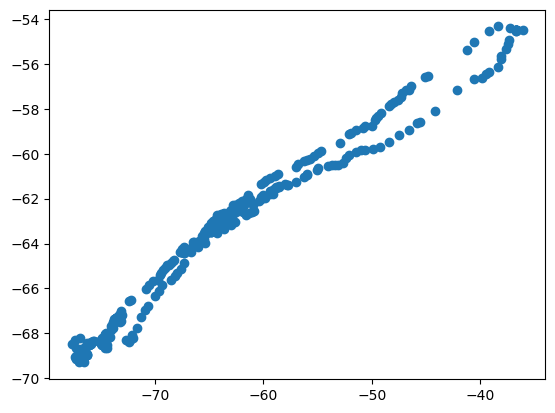

In [15]:
lons, lats = meop[["LON", "LAT"]].drop_duplicates()["LON"].values, meop[["LON", "LAT"]].drop_duplicates()["LAT"].values
plt.scatter(lons, lats)

#### For plotting maps and handling different map projections, use Cartopy. 

For technical reasons (that I do not understand!), it is difficult to install Cartopy on this Jupyterhub server. But I encourage you to try using it for plotting spatial data on maplike projections. You can read more here: https://scitools.org.uk/cartopy/docs/latest/

In [63]:
myStation = (meop.loc[:, "Station"] == 1)

In [65]:
meop.loc[myStation]

,Cruise,Station,Type,LON,LAT,DEPTH,QF,TEMP,QF.1,SAL,QF.2,datetime
0,ct9-28597-05,1,C,-61.017,-62.609,6.0,0,1.1550,0,34.1600,0,2005-02-22 17:40:00
1,ct9-28597-05,1,C,-61.017,-62.609,7.0,0,1.1545,0,34.1604,0,2005-02-22 17:40:00
2,ct9-28597-05,1,C,-61.017,-62.609,8.0,0,1.1539,0,34.1609,0,2005-02-22 17:40:00
3,ct9-28597-05,1,C,-61.017,-62.609,9.0,0,1.1534,0,34.1613,0,2005-02-22 17:40:00
4,ct9-28597-05,1,C,-61.017,-62.609,10.0,0,1.1528,0,34.1617,0,2005-02-22 17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...
238,ct9-28597-05,1,C,-61.017,-62.609,244.0,0,0.2395,0,34.4150,0,2005-02-22 17:40:00
239,ct9-28597-05,1,C,-61.017,-62.609,245.0,0,0.2382,0,34.4162,0,2005-02-22 17:40:00
240,ct9-28597-05,1,C,-61.017,-62.609,246.0,0,0.2370,0,34.4174,0,2005-02-22 17:40:00
241,ct9-28597-05,1,C,-61.017,-62.609,247.0,0,0.2357,0,34.4186,0,2005-02-22 17:40:00


In [66]:
meop.loc[243]

Cruise             ct9-28597-05
Station                       2
Type                          C
LON                      -61.56
LAT                     -62.714
DEPTH                       6.0
QF                            0
TEMP                      1.225
QF.1                          0
SAL                      34.096
QF.2                          0
datetime    2005-02-22 23:10:00
Name: 243, dtype: object

In [67]:
select_station = (meop.Station == 10)
meop.loc[select_station]

,Cruise,Station,Type,LON,LAT,DEPTH,QF,TEMP,QF.1,SAL,QF.2,datetime
2749,ct9-28597-05,10,C,-66.705,-64.36,6.0,0,1.1099,0,33.8720,0,2005-02-25 12:10:00
2750,ct9-28597-05,10,C,-66.705,-64.36,7.0,0,1.1099,0,33.8725,0,2005-02-25 12:10:00
2751,ct9-28597-05,10,C,-66.705,-64.36,8.0,0,1.1099,0,33.8730,0,2005-02-25 12:10:00
2752,ct9-28597-05,10,C,-66.705,-64.36,9.0,0,1.1099,0,33.8735,0,2005-02-25 12:10:00
2753,ct9-28597-05,10,C,-66.705,-64.36,10.0,0,1.1099,0,33.8740,0,2005-02-25 12:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3223,ct9-28597-05,10,C,-66.705,-64.36,480.0,0,1.4142,0,34.8809,0,2005-02-25 12:10:00
3224,ct9-28597-05,10,C,-66.705,-64.36,481.0,0,1.4132,0,34.8806,0,2005-02-25 12:10:00
3225,ct9-28597-05,10,C,-66.705,-64.36,482.0,0,1.4121,0,34.8804,0,2005-02-25 12:10:00
3226,ct9-28597-05,10,C,-66.705,-64.36,483.0,0,1.4111,0,34.8801,0,2005-02-25 12:10:00


In [68]:
meop.loc[select_station, "TEMP"]

2749    1.1099
2750    1.1099
2751    1.1099
2752    1.1099
2753    1.1099
         ...  
3223    1.4142
3224    1.4132
3225    1.4121
3226    1.4111
3227    1.4100
Name: TEMP, Length: 479, dtype: float64

<Axes: >

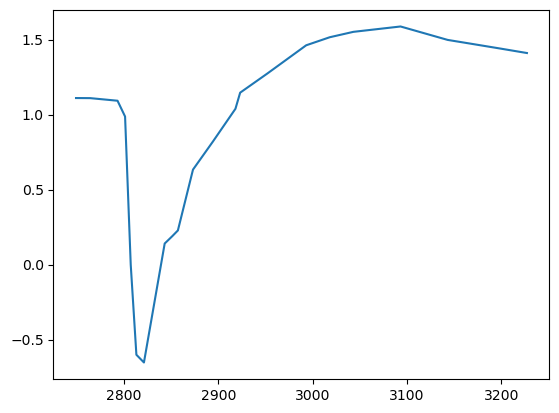

In [69]:
meop.loc[select_station, "TEMP"].plot()

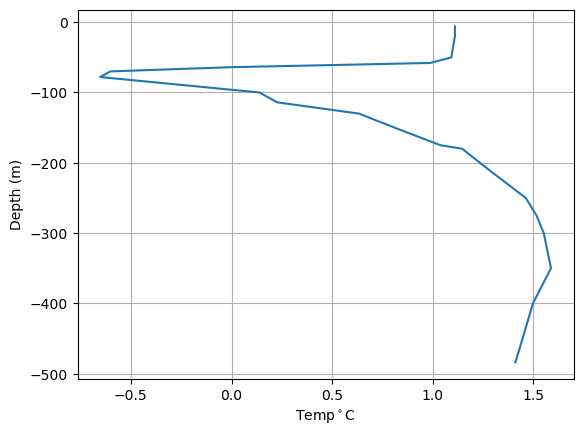

In [72]:
plt.plot(meop.loc[select_station, "TEMP"], -meop.loc[select_station, "DEPTH"])
plt.ylabel("Depth (m)")
plt.xlabel("Temp$^\circ$C")
plt.grid()

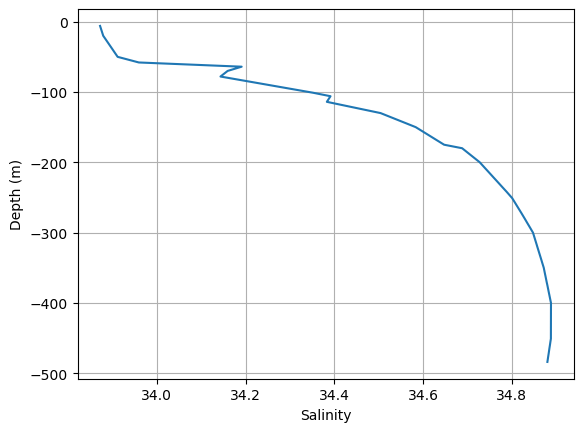

In [73]:
plt.plot(meop.loc[select_station, "SAL"], -meop.loc[select_station, "DEPTH"])
plt.ylabel("Depth (m)")
plt.xlabel("Salinity")
plt.grid()

In [20]:
import matplotlib.pyplot as plt

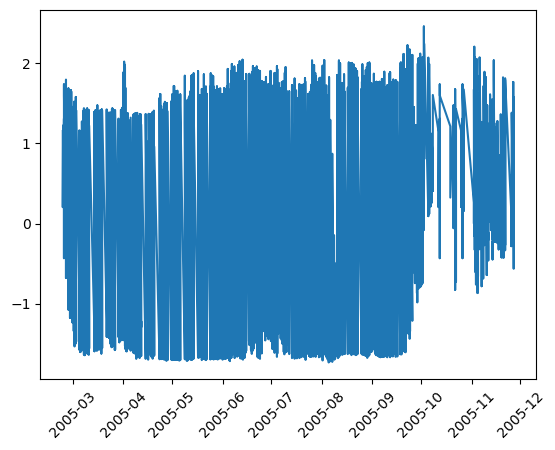

In [74]:
plt.plot(meop.datetime, meop.TEMP)
plt.xticks(rotation=45);

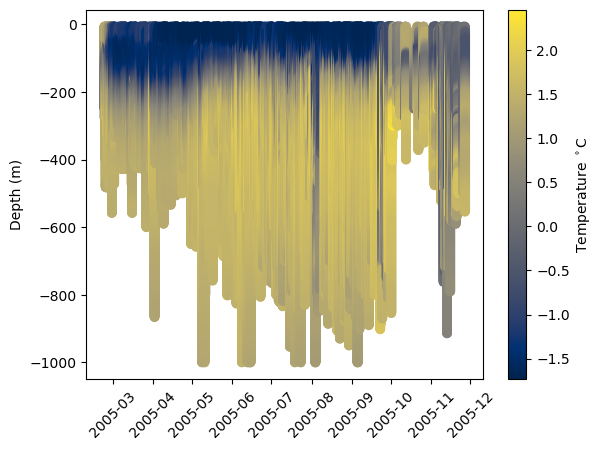

In [76]:
SC = plt.scatter(meop.datetime, -meop.DEPTH, c=meop.TEMP, cmap="cividis")
cbar = plt.colorbar(SC)
cbar.set_label("Temperature $^\circ$C") # label accepts Latex math code
plt.xticks(rotation=45); #semicolon suppresses any output to display
plt.ylabel("Depth (m)");

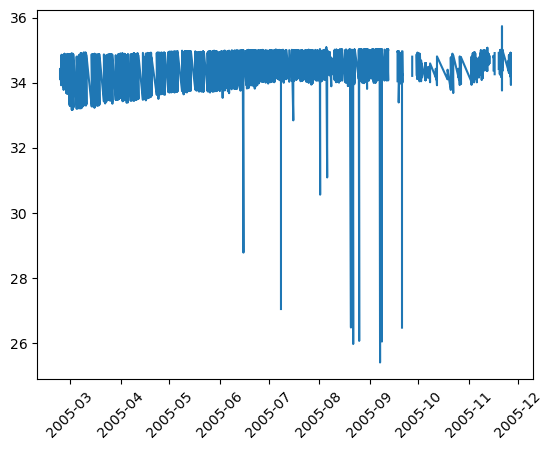

In [77]:
plt.plot(meop.datetime, meop.SAL)
plt.xticks(rotation=45);

Text(0.5, 0, 'Time')

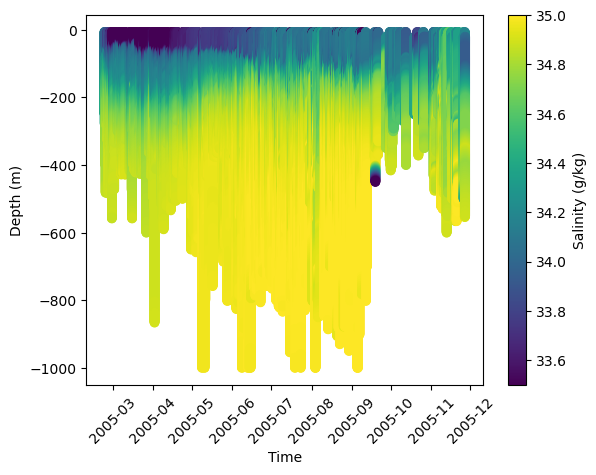

In [79]:
SC = plt.scatter(meop.datetime, -meop.DEPTH, c=meop.SAL, vmin=33.5, vmax=35.)
cbar = plt.colorbar(SC)
cbar.set_label("Salinity (g/kg)") # label accepts Latex math code
plt.xticks(rotation=45); #semicolon suppresses any output to display
plt.ylabel("Depth (m)");
plt.xlabel("Time")

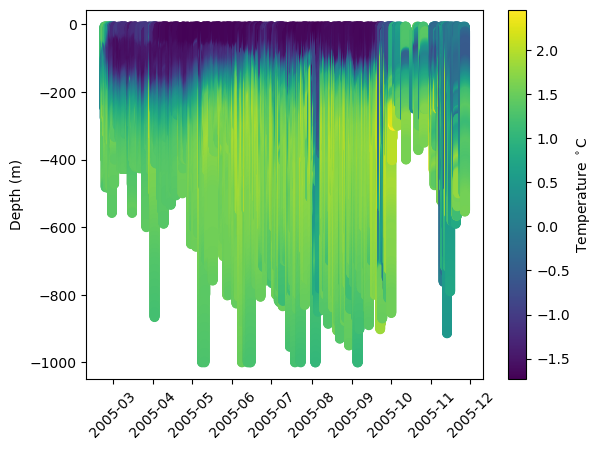

In [25]:
SC = plt.scatter(meop.datetime, -meop.DEPTH, c=meop.TEMP)
cbar = plt.colorbar(SC)
cbar.set_label("Temperature $^\circ$C") # label accepts Latex math code
plt.xticks(rotation=45); #semicolon suppresses any output to display
plt.ylabel("Depth (m)");

In [84]:
meop.loc[:, "datetime"].dt.month

0          2
1          2
2          2
3          2
4          2
          ..
270868    11
270869    11
270870    11
270871    11
270872    11
Name: datetime, Length: 270873, dtype: int32

In [85]:
dfsel = (meop.datetime.dt.month == 9) & (-meop.DEPTH < -300) & (meop.SAL < 33.5)
meop.loc[dfsel]

,Cruise,Station,Type,LON,LAT,DEPTH,QF,TEMP,QF.1,SAL,QF.2,datetime
221707,ct9-28597-05,409,C,-61.628,-61.998,447.0,0,1.9511,0,33.4850,0,2005-09-18 22:20:00
221708,ct9-28597-05,409,C,-61.628,-61.998,448.0,0,1.9511,0,33.4535,0,2005-09-18 22:20:00
221709,ct9-28597-05,409,C,-61.628,-61.998,449.0,0,1.9511,0,33.4219,0,2005-09-18 22:20:00
221710,ct9-28597-05,409,C,-61.628,-61.998,450.0,0,1.9511,0,33.3904,0,2005-09-18 22:20:00


In [89]:
rows_to_drop = meop.loc[dfsel].index.values

In [92]:
meop = meop.drop(rows_to_drop)

In [108]:
idx = meop.index.values

In [110]:
np.where(idx == 221707)

(array([], dtype=int64),)

In [112]:
np.argmin(np.abs(meop.loc[:, "LAT"] - -63))

148326

In [125]:
locations = meop.drop_duplicates(subset=["LON", "LAT"]).loc[:, ["LON", "LAT", "datetime"]]

In [127]:
locations

,LON,LAT,datetime
0,-61.017,-62.609,2005-02-22 17:40:00
243,-61.560,-62.714,2005-02-22 23:10:00
516,-62.576,-63.050,2005-02-23 11:10:00
911,-63.023,-63.172,2005-02-23 16:20:00
1388,-63.653,-63.349,2005-02-23 23:10:00
...,...,...,...
268454,-60.442,-62.121,2005-11-21 16:20:00
268949,-60.899,-62.541,2005-11-25 11:30:00
269312,-60.973,-62.298,2005-11-25 16:40:00
269793,-62.638,-62.282,2005-11-26 16:10:00


In [134]:
import cartopy.crs as ccrs

/Users/an1n23/anaconda3/envs/oceanpy/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


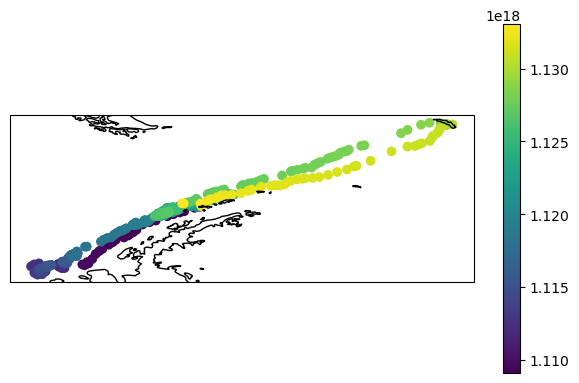

In [136]:
plt.figure(figsize= (190/25.4, 230*0.5/25.4))

mapax = plt.subplot(projection = ccrs.PlateCarree())

SC = mapax.scatter(locations["LON"], locations["LAT"], c=locations["datetime"])
plt.colorbar(SC)
mapax.coastlines()

In [139]:
np.arange(0, 501, 20)

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500])

In [29]:
meop.groupby(pd.cut(meop.DEPTH, np.arange(0, 501, 20) ))[["TEMP", "SAL"]].mean()

,TEMP,SAL
DEPTH,,
"(0, 20]",-1.155686,33.816767
"(20, 40]",-1.161063,33.884601
"(40, 60]",-1.159490,33.952705
"(60, 80]",-1.095671,34.079626
"(80, 100]",-0.917135,34.179034
"(100, 120]",-0.606899,34.276146
"(120, 140]",-0.229736,34.375871
"(140, 160]",0.118882,34.468593
"(160, 180]",0.432680,34.549585


GSW is the Gibbs Seawater equation of state toolbox. It contains various functions that can compute the density and related state variables from other inter-related variables, such as temperature, salinity, and depth.

In [140]:
import gsw

In [141]:
gsw.SA_from_SP?

Signature: gsw.SA_from_SP(SP, p, lon, lat)
Docstring:
Calculates Absolute Salinity from Practical Salinity.  Since SP is
non-negative by definition, this function changes any negative input
values of SP to be zero.

Parameters
----------
SP : array-like
    Practical Salinity (PSS-78), unitless
p : array-like
    Sea pressure (absolute pressure minus 10.1325 dbar), dbar
lon : array-like
    Longitude, -360 to 360 degrees
lat : array-like
    Latitude, -90 to 90 degrees

Returns
-------
SA : array-like, g/kg
    Absolute Salinity
File:      ~/anaconda3/envs/oceanpy/lib/python3.9/site-packages/gsw/_wrapped_ufuncs.py
Type:      function

In [143]:
meop["SA"] = gsw.SA_from_SP(meop.SAL, meop.DEPTH, meop.LON, meop.LAT)

In [144]:
meop["CT"] = gsw.CT_from_t(meop["SA"], meop.TEMP, meop.DEPTH)

In [145]:
meop["sigma0"] = gsw.sigma0(meop.SA, meop["CT"])

In [148]:
bad_salinities = (meop["SAL"] < 33.5)

In [152]:
meop = meop.drop( meop.loc[bad_salinities].index)

In [154]:
meop.columns

Index(['Cruise', 'Station', 'Type', 'LON', 'LAT', 'DEPTH', 'QF', 'TEMP',
       'QF.1', 'SAL', 'QF.2', 'datetime', 'SA', 'CT', 'sigma0'],
      dtype='object')

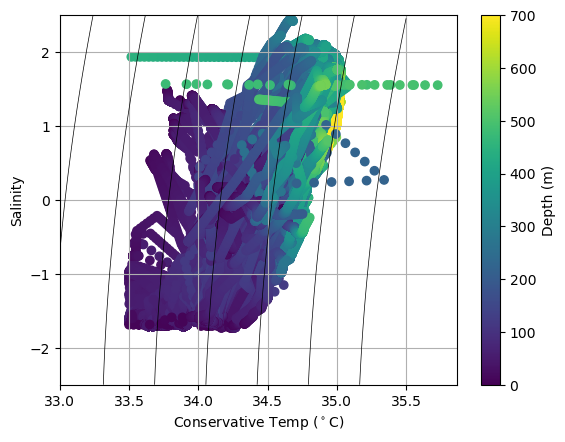

In [180]:
SC = plt.scatter(meop["SAL"], meop["CT"], c=meop["DEPTH"], vmin=0, vmax=700)


plt.contour(sal_mesh, temp_mesh, sigma_mesh, colors="k", linewidths=0.5)

plt.xlabel("Conservative Temp ($^\\circ$C)")
plt.ylabel("Salinity")
cbar = plt.colorbar(SC, label="Depth (m)")

plt.grid()

In [174]:
temp_range = np.linspace(-2.5, 2.5, 200)
sal_range = np.linspace(33, 35.5, 200)

sal_mesh, temp_mesh = np.meshgrid(sal_range, temp_range)

In [175]:
sigma_mesh = gsw.sigma0(sal_mesh, temp_mesh)

In [37]:
%matplotlib inline

A quick way of understanding the watermasses in our dataset is by using a standard Temperature -- Salinity plot.

<a list of 5 text.Text objects>

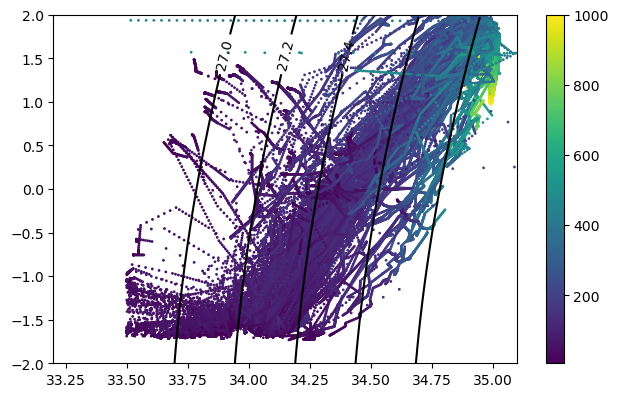

In [181]:
fig = plt.figure(figsize=(190/25.4, 230*0.5/25.4)) # Divide by millimeters by 25.4 to arrive at inches (matplotlib accepts sizes in inches)
ax = plt.subplot()

SC = ax.scatter(meop.SAL, meop.CT, c=meop.DEPTH, s=1)
ax.set_xlim(33.2, 35.1)
ax.set_ylim(-2, 2)
CR = ax.contour(sal_range, temp_range, sigma_mesh, colors="k", levels=np.arange(27,28,0.2))
plt.colorbar(SC)
ax.clabel(CR)

In [39]:
meop.datetime.dt.month.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

### Binning the data

Groupby and apply functions

In [40]:
def compute_depth_binned_mean(gdf, binsize=20):
    return gdf.groupby(pd.cut(gdf.DEPTH, np.arange(0, 501, binsize) ))[["TEMP", "SAL"]].mean()

In [41]:
depth_month_binned_mean = meop.groupby(pd.cut(meop.datetime.dt.month, np.arange(1.5, 12) )).apply(compute_depth_binned_mean)

In [42]:
depth_month_binned_mean

TEMP        SAL
datetime     DEPTH                          
(1.5, 2.5]   (0, 20]     0.811821  33.780374
             (20, 40]    0.700296  33.805247
             (40, 60]    0.424375  33.919870
             (60, 80]   -0.157846  34.079373
             (80, 100]  -0.226672  34.208029
...                           ...        ...
(10.5, 11.5] (400, 420]  0.928597  34.858271
             (420, 440]  0.902551  34.862796
             (440, 460]  0.906871  34.878542
             (460, 480]  0.946012  34.872032
             (480, 500]  0.994814  34.910631

[250 rows x 2 columns]

In [43]:
depth_month_binned_mean.values.shape

(250, 2)

In [44]:
def compute_depth_binned_mean_values(gdf, binsize=20):
    return gdf.groupby(pd.cut(gdf.DEPTH, np.arange(0, 501, binsize) ))[["CT", "SAL"]].mean().values

In [45]:
depth_month_binned_mean = np.stack(meop.groupby(pd.cut(meop.datetime.dt.month, np.arange(1.5, 12) )).apply(compute_depth_binned_mean_values))

In [46]:
depth_month_binned_mean.shape

(10, 25, 2)

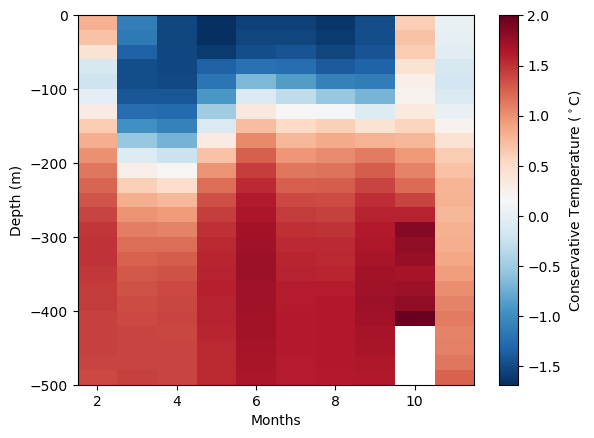

In [47]:
PC = plt.pcolormesh(np.arange(1.5,12), np.arange(0,-501, -20), depth_month_binned_mean[:, :, 0].T, cmap="RdBu_r")
plt.xlabel("Months")
plt.ylabel("Depth (m)")
cbar = plt.colorbar(PC, label="Conservative Temperature ($^\circ$C)")

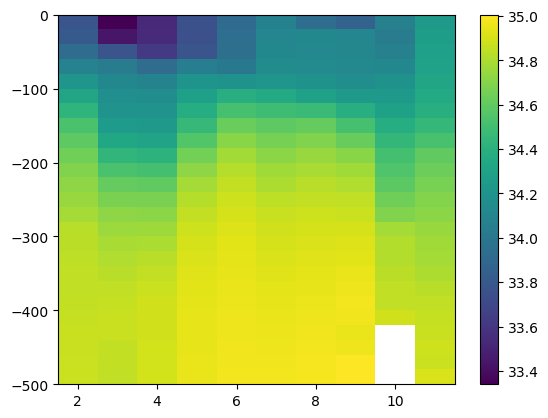

In [48]:
PC = plt.pcolormesh(np.arange(1.5,12), np.arange(0,-501, -20), depth_month_binned_mean[:, :, 1].T, cmap="viridis")
plt.colorbar(PC)

## Exercise 06: Visualize temperature and salinity means binned by latitude and by depth (20m bins)

1. You will have to first bin the data by latitude, then call the function above (using "apply") that computes the mean in depth bins.
1. Make a 2-D plot with latitude bins on the X axis and depth bins on the Y axis.
1. Make sure to label your axes and the colorbar.
1. Ensure that the colormap is representative of the data -- diverging or sequential colormaps. See [colormap gallery here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).
1. Save the figure as a jpg with a DPI of 150.